## Project Name: Surprise Housing 

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



In [1]:
#numpy
import numpy as np
#pandas
import pandas as pd
#plot
from matplotlib import pyplot as plt
import seaborn as sns
#statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data from csv into data frame
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Explore the Dataset

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Fill in nan in GarageYrBlt with YearBuilt value
df['GarageYrBlt'] = df['GarageYrBlt'].mask(df['GarageYrBlt'].isnull(), df['YearBuilt'])

In [7]:
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False))
# Let us drop columns which has very few non-null values (Alley, FireplaceQu, PoolQC, Fence, MiscFeature) and also 'Id'

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [8]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    if count > 1200:
      print('#', column_name, ' : ', count)

# BsmtFinSF2  :  1293
# LowQualFinSF  :  1434
# BsmtHalfBath  :  1378
# EnclosedPorch  :  1252
# 3SsnPorch  :  1436
# ScreenPorch  :  1344
# PoolArea  :  1453
# MiscVal  :  1408


# Result of Data Analysis:
1. ID column needs to be dropped, as it is a serial number / ID - and adds no value to the model
2. Multicollinearity - exists among below fields, hence all of them but one - can be dropped.
-             Feature1      Feature2  Correlation
-      1025   GarageArea    GarageCars     0.882475
-      931   GarageYrBlt     YearBuilt     0.825667
-      615     GrLivArea  TotRmsAbvGrd     0.825489
-      493      1stFlrSF   TotalBsmtSF     0.819530
3. PoolQC        'NA'      1453/1460 - only 7 records has valid data.
4. MiscFeature   'NA'      1406/1460 - 
5. Alley         'NA'      1369/1460 - has NA value, but this means <b>NA 	No alley access</b>   

In [10]:
df.drop(['Id','Alley','PoolQC', 'FireplaceQu', 'Fence','MiscFeature'], axis=1, inplace=True)
df.shape

(1460, 75)

In [11]:
df.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch'
,'3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis=1, inplace=True)
df.shape

(1460, 67)

# Verify Assumptions of Linear Regression
- Assumptions
* Linear relationship between dependent and independent variables
* Error terms should be independent
* Error terms should be normally distributed
* Error terms should have equal variance

- Lets plot residuals vs predictions and detect non-linearity, unequal error variances, and outliers.
- Lets plot a histogram of the error terms detects non-normality of the error values.

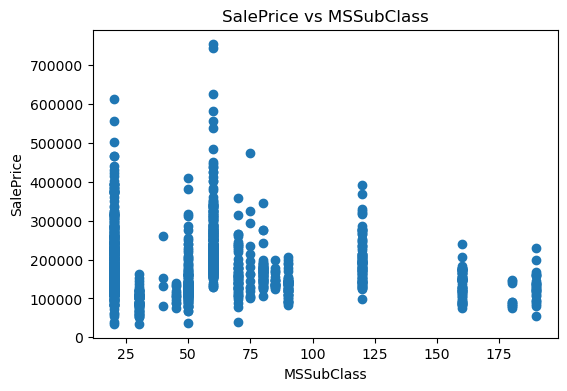

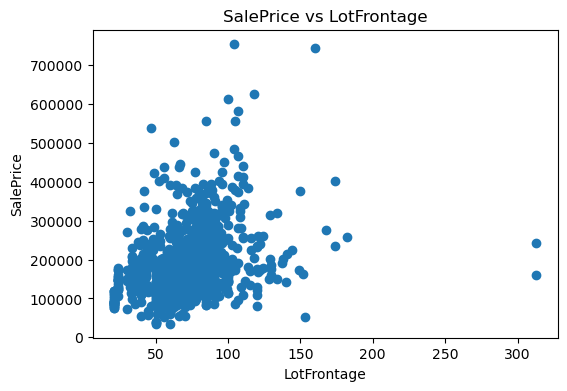

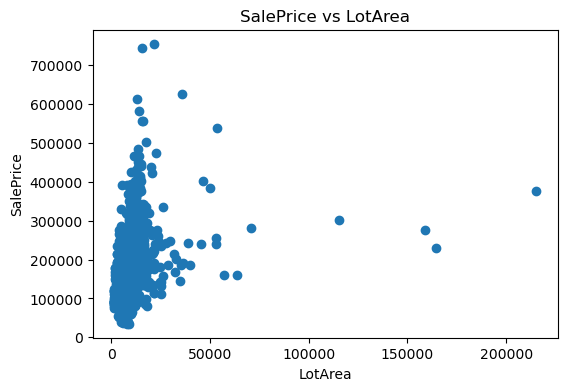

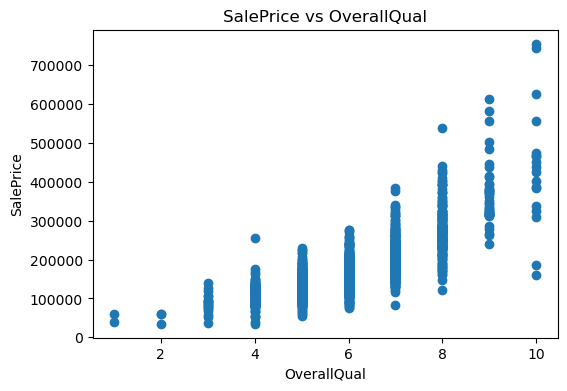

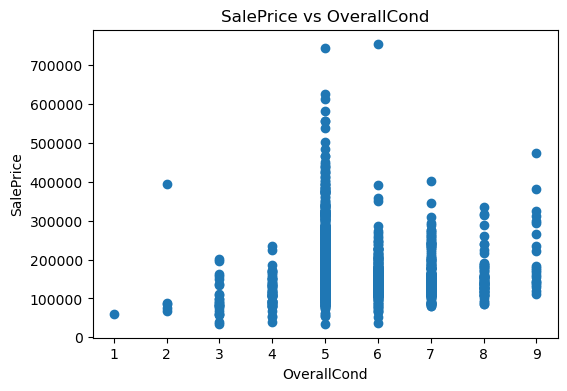

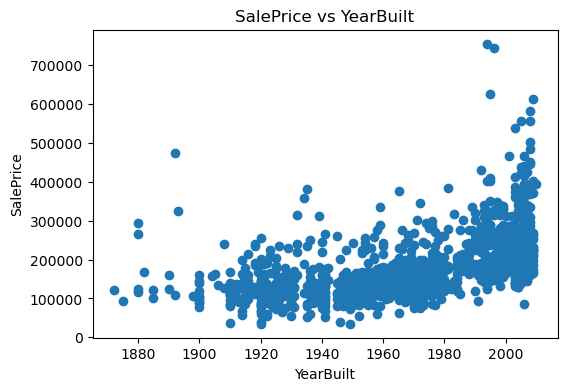

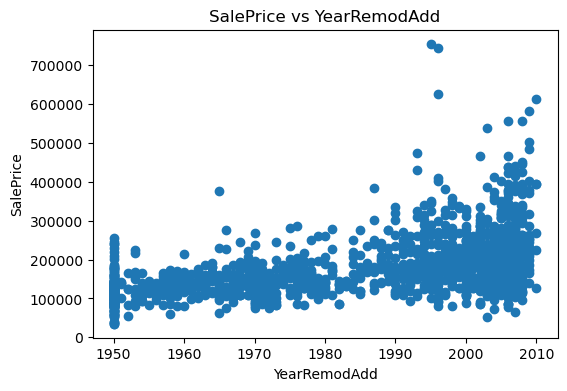

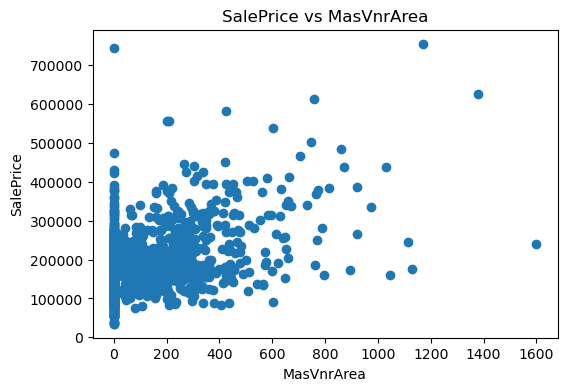

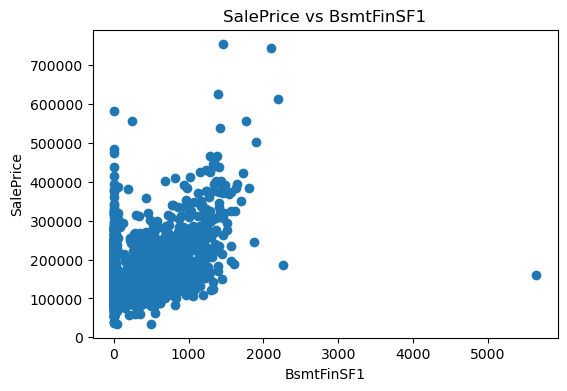

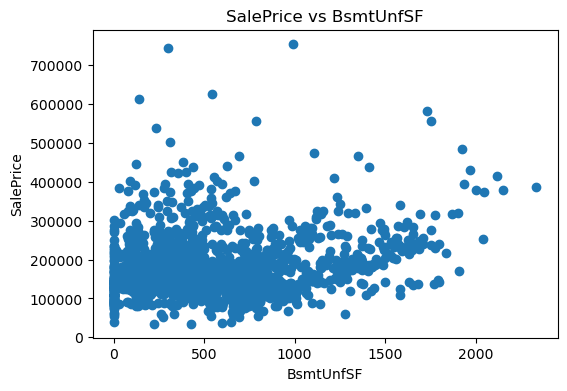

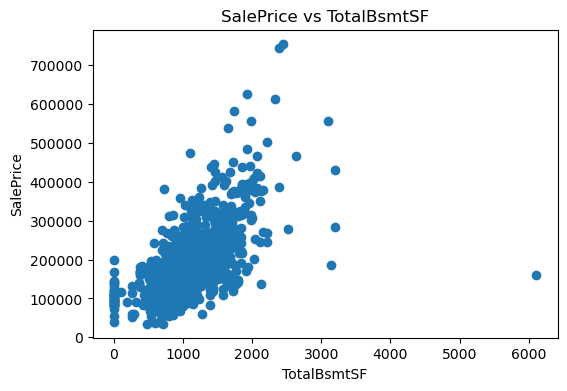

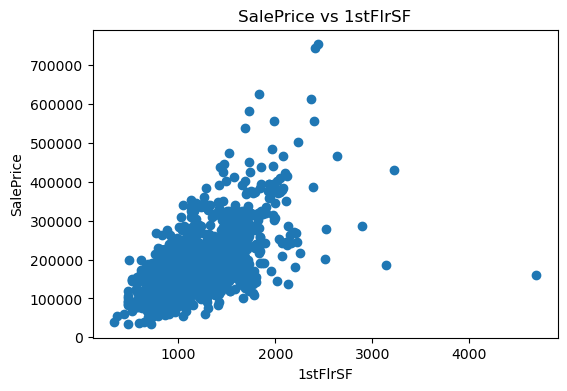

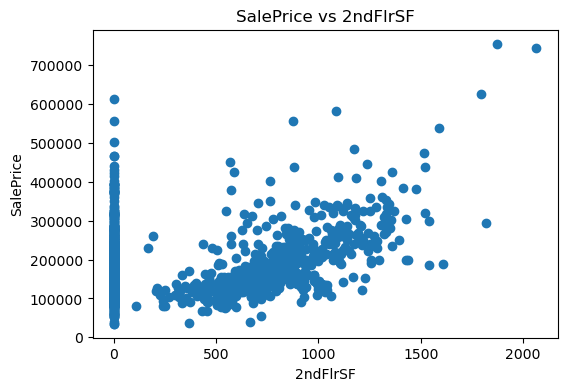

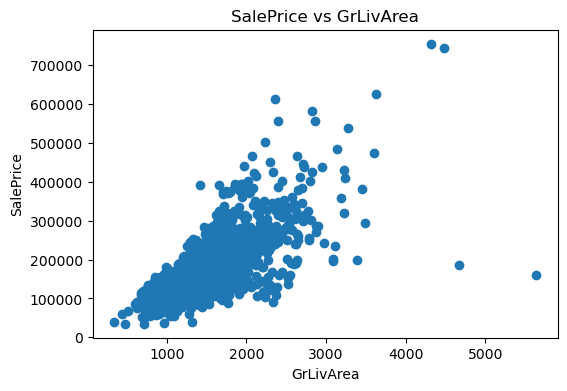

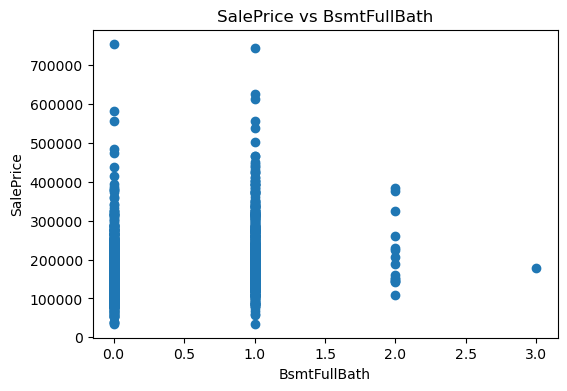

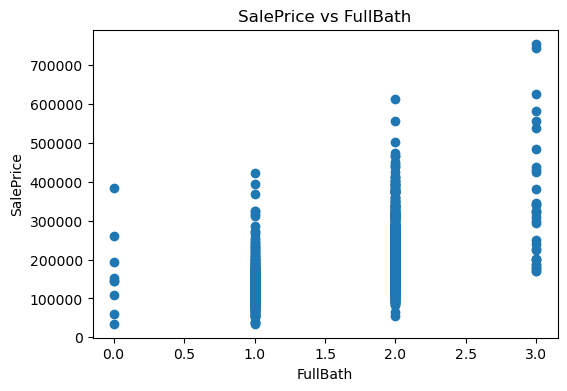

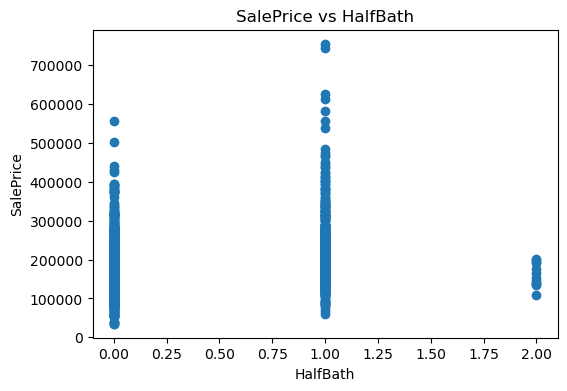

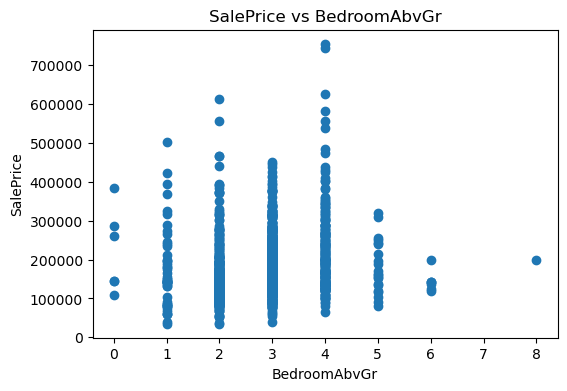

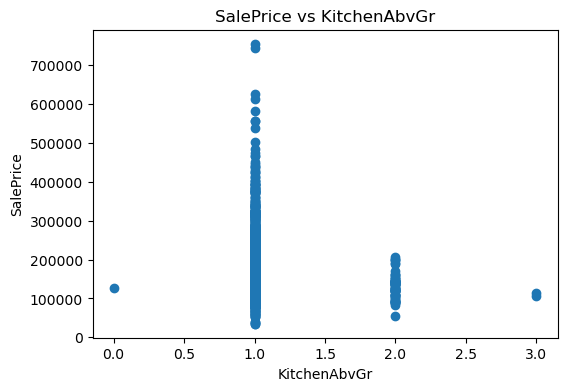

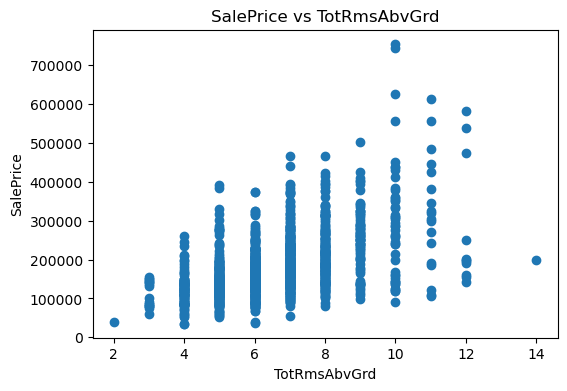

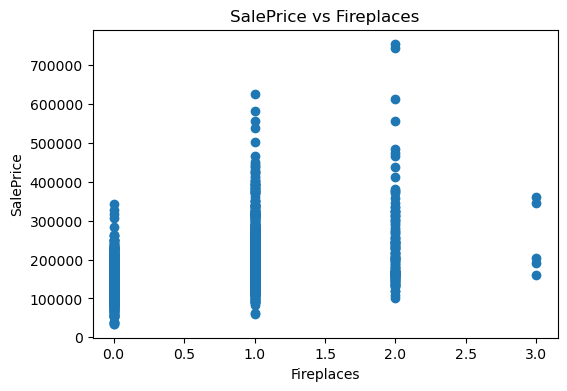

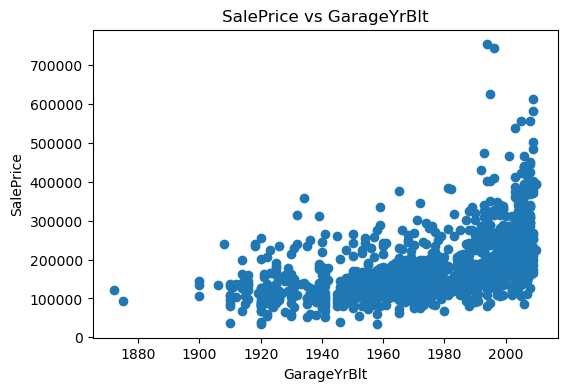

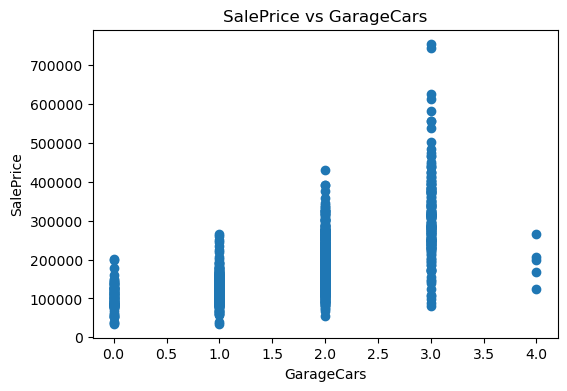

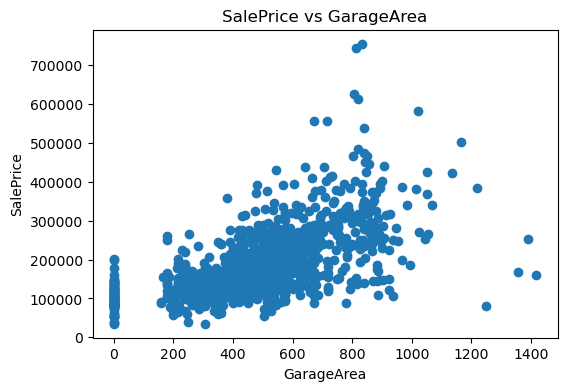

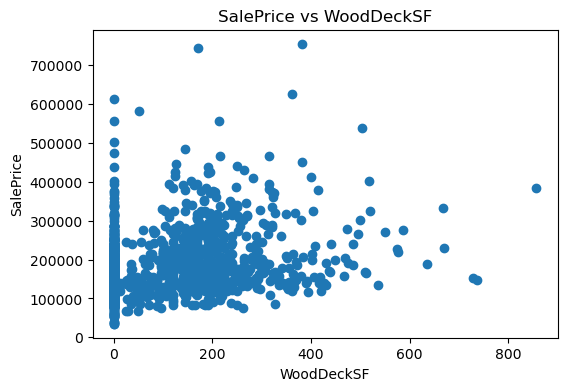

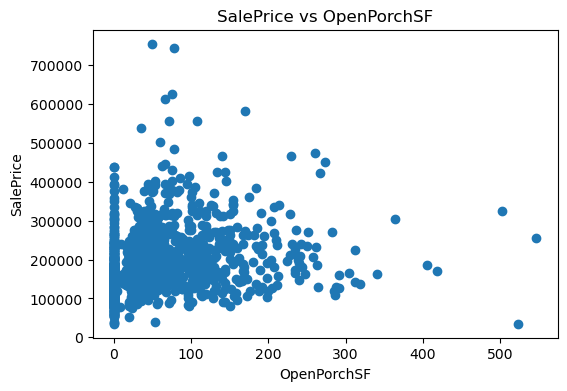

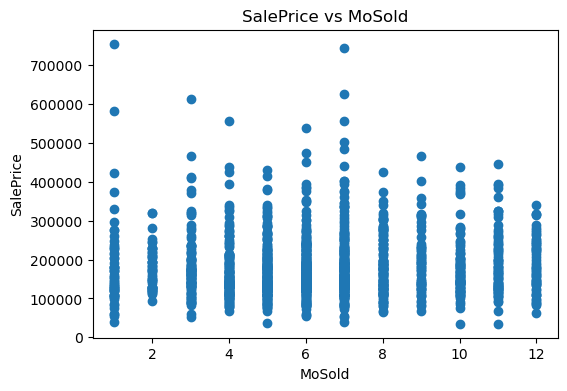

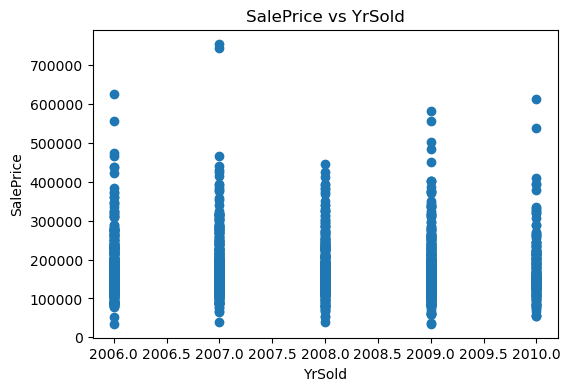

In [12]:
num_df = pd.DataFrame()
dftype_dict = df.dtypes.to_dict()
for col,typ in dftype_dict.items():
    #print(col, typ)
    if (typ in ('int64','float64')):
        num_df[col] = df[col]
        
independent_vars = num_df.columns.drop('SalePrice')
# Create scatter plots
for var in independent_vars:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[var], df['SalePrice'])
    plt.title(f'SalePrice vs {var}')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()

# Correlation Coefficient
Including SalePrice: Useful for identifying how <b>each feature</b> correlates with the <b>target variable</b>, which is valuable for feature selection in predictive modeling.

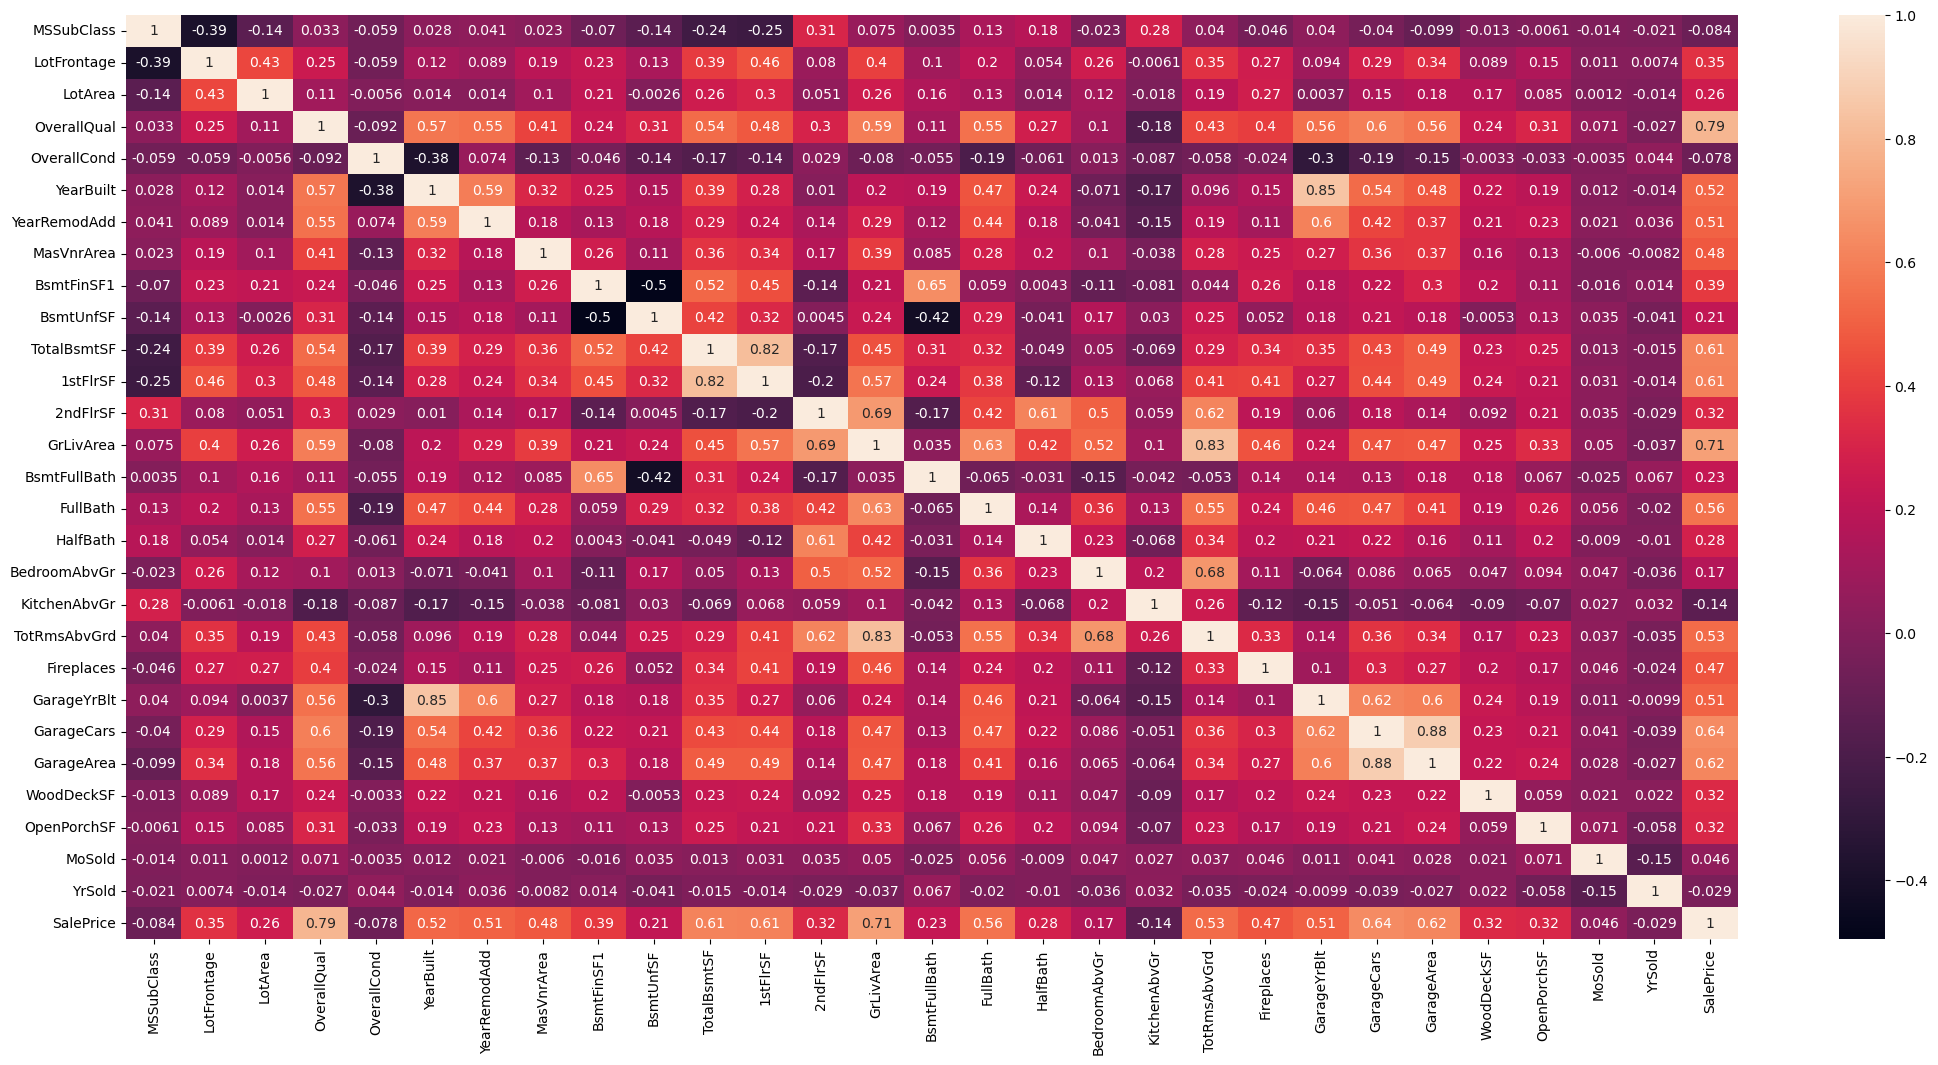

In [13]:
#Correlation Coefficient
#correlations = num_df.corr()
#print(correlations)
plt.figure(figsize=(26, 12)) 
sns.heatmap(num_df.corr(), annot=True)  
plt.show()

- Excluding SalePrice: Useful for understanding the relationships and potential <b>multicollinearity </b>among the independent variables, which is important for model stability and performance.

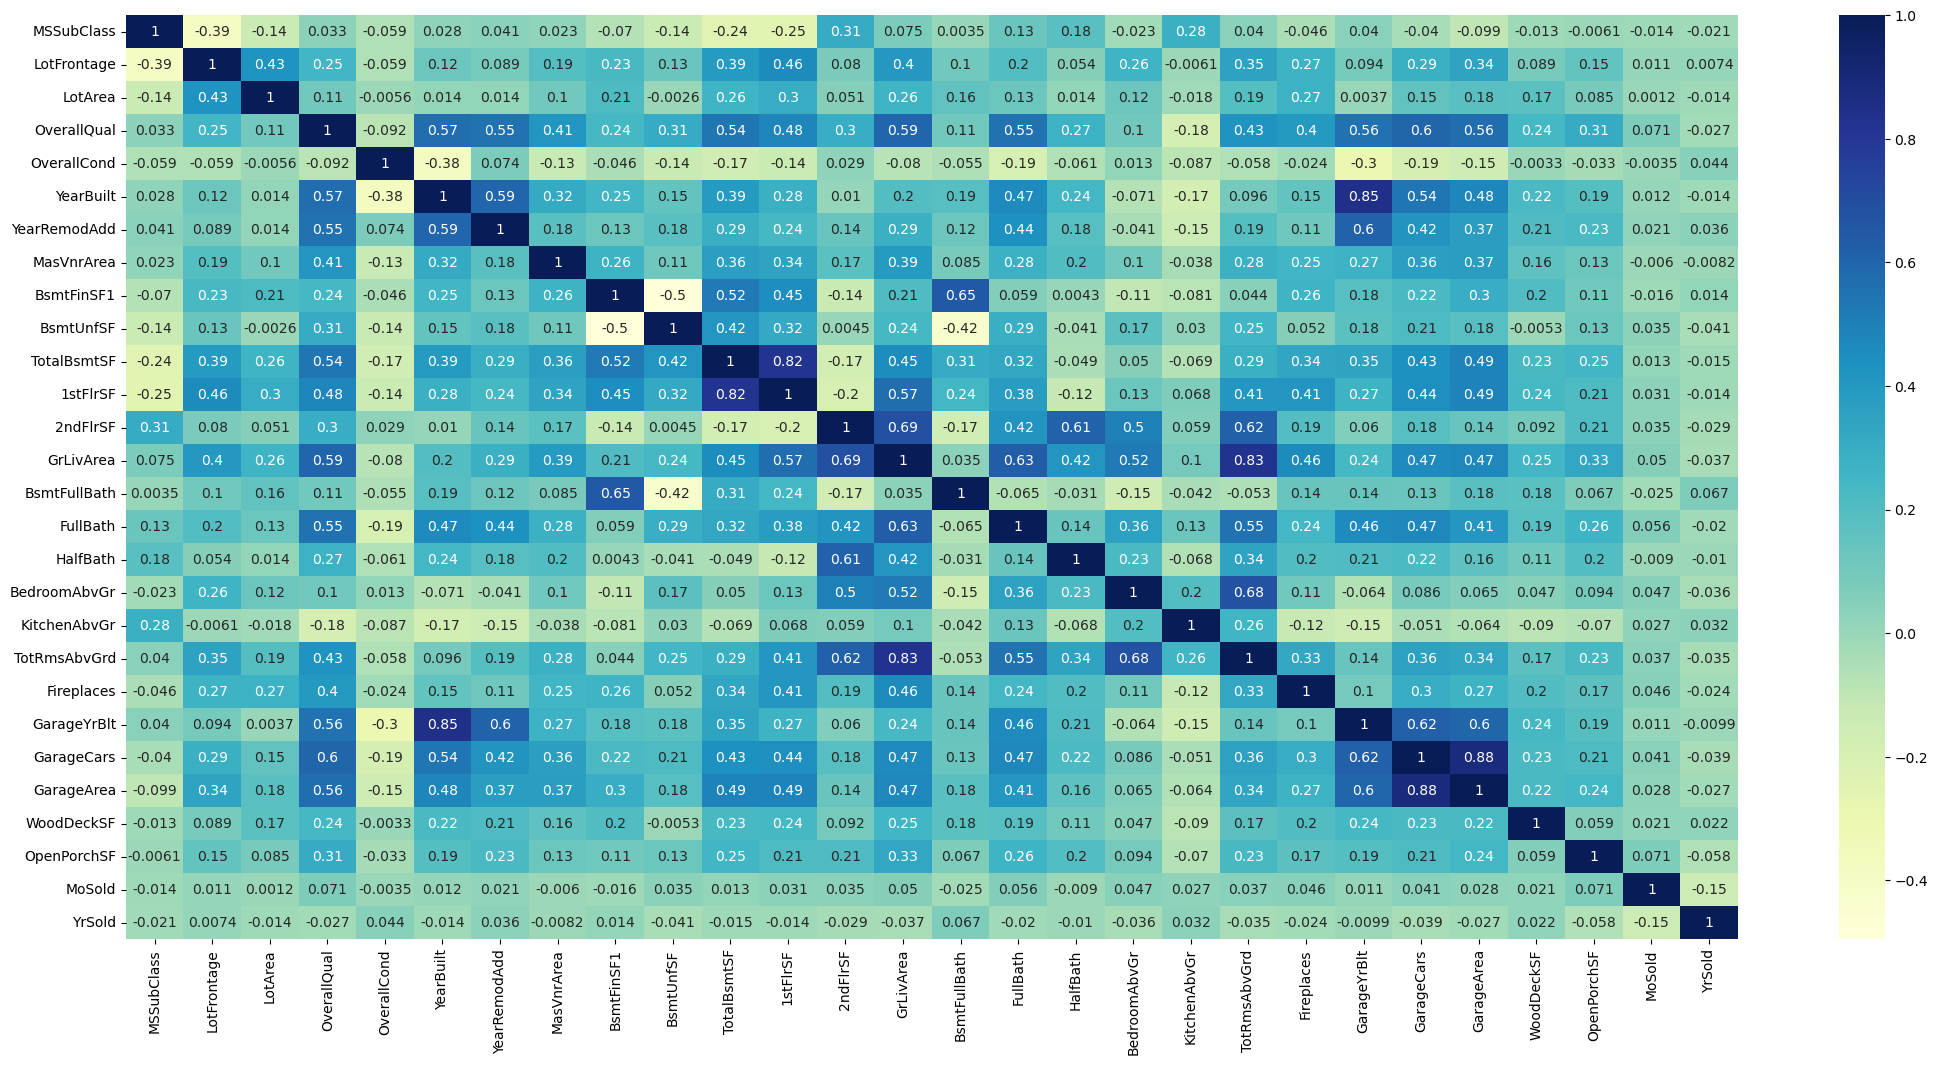

In [14]:
independent_vars = num_df.drop('SalePrice', axis=1)
plt.figure(figsize=(26, 12))
sns.heatmap(independent_vars.corr(), annot=True,  cmap='YlGnBu')
plt.show()

- Lets try to order the corr values and see pairs with +ve and -ve corr values

In [15]:
# Compute the correlation matrix
# independent_vars - does not have target variable - SalePrice
# abs() - to include both +ve and -ve corr values
correlation_matrix = independent_vars.corr().abs()

# Unstack the correlation matrix and reset the index
corr_pairs = correlation_matrix.unstack().reset_index()

# Rename the columns for clarity
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter pairs where the correlation is above a specific threshold (e.g., 0.8)
threshold = 0.8
high_corr_pairs = corr_pairs[(corr_pairs['Correlation'] > threshold) & (corr_pairs['Feature1'] != 'SalePrice') & (corr_pairs['Feature2'] != 'SalePrice') & (corr_pairs['Feature1'] != corr_pairs['Feature2'])]

# Remove duplicate pairs (e.g., (A, B) and (B, A))
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] < high_corr_pairs['Feature2']]

# Sort by correlation
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

# Display the resulting DataFrame
print(high_corr_pairs)

        Feature1      Feature2  Correlation
666   GarageArea    GarageCars     0.882475
593  GarageYrBlt     YearBuilt     0.845141
383    GrLivArea  TotRmsAbvGrd     0.825489
318     1stFlrSF   TotalBsmtSF     0.819530


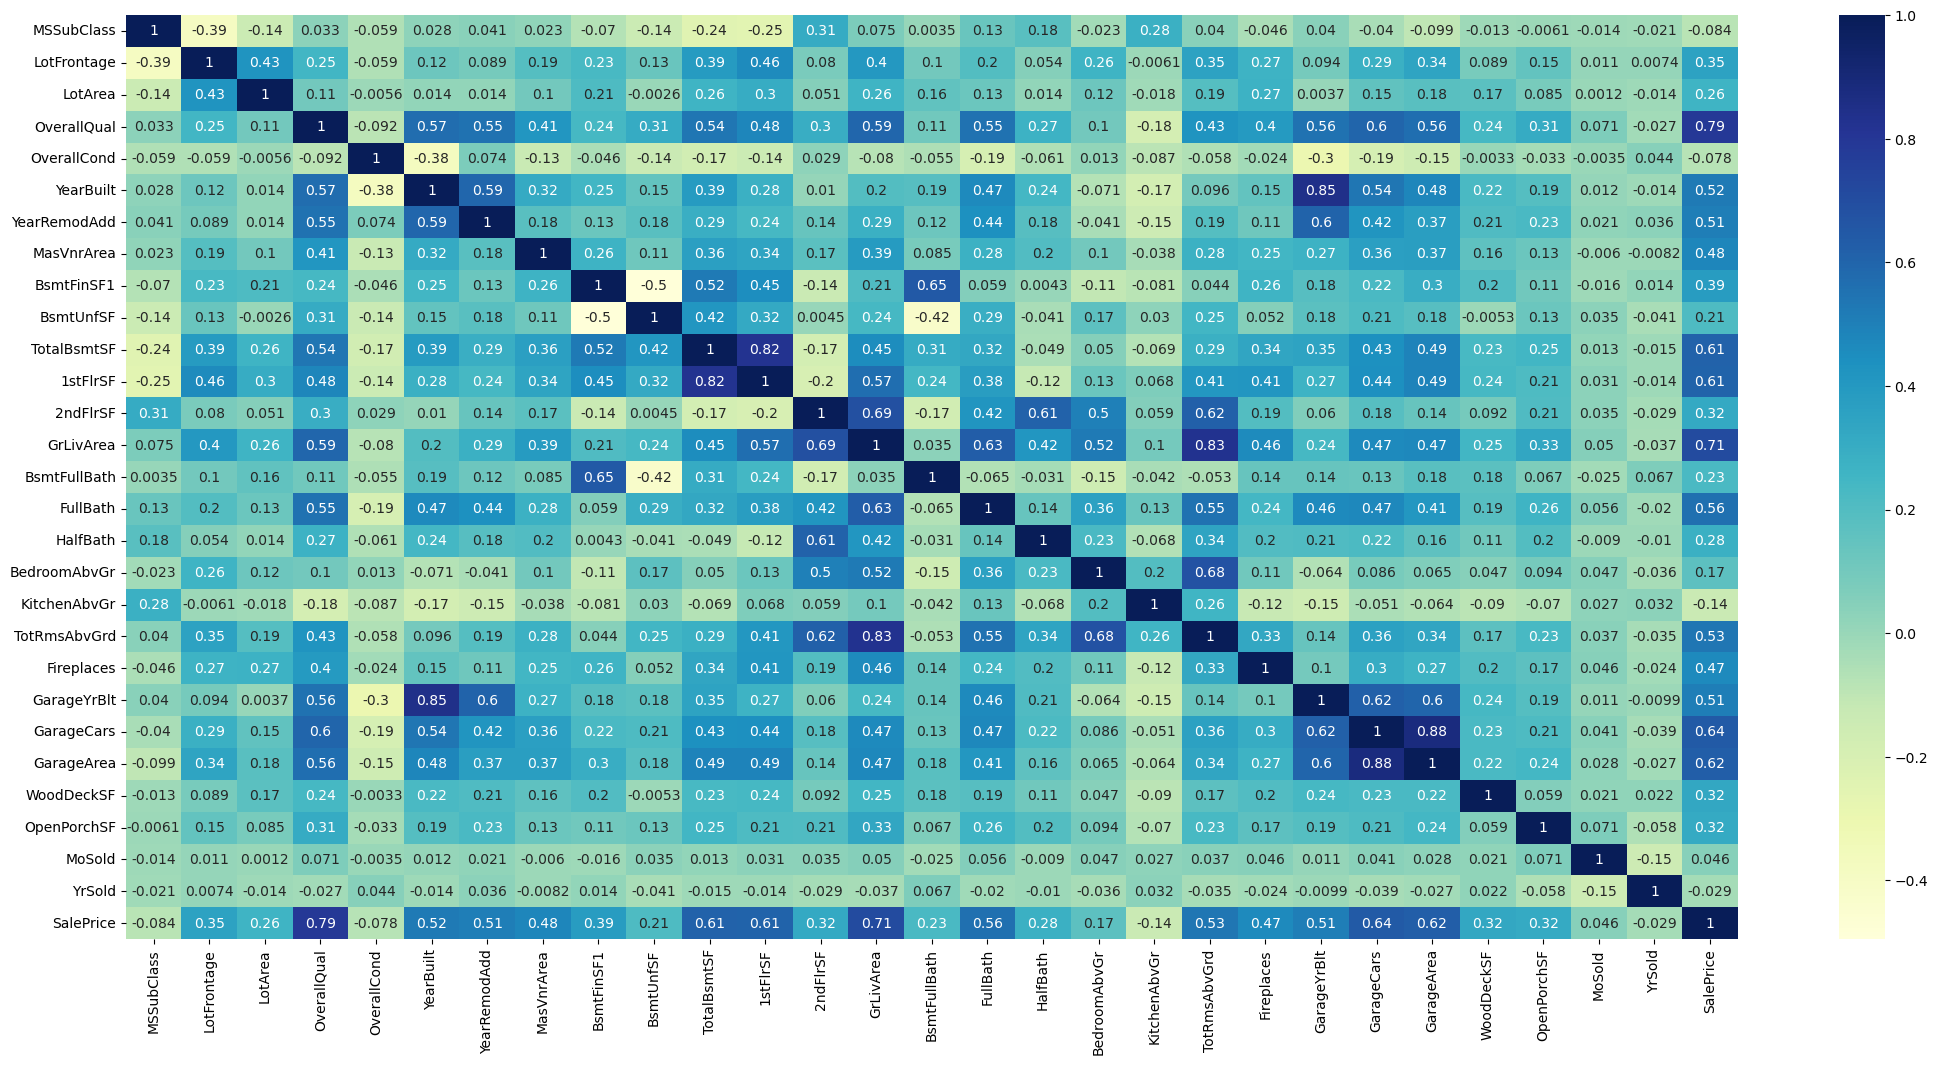

In [16]:
all_vars = num_df
plt.figure(figsize=(26, 12))
sns.heatmap(all_vars.corr(), annot=True,  cmap='YlGnBu')
plt.show()

# Linear Regression - Model basic testing

In [17]:
X1 = num_df.drop('SalePrice', axis=1)
y1 = num_df['SalePrice']
# Add a constant to the model (intercept)
X1 = sm.add_constant(X1)
#fill nan with mean
X1.fillna(X1.mean(), inplace=True) 
# Fit the linear regression model
model1 = sm.OLS(y1, X1).fit()

# Print the summary of the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     219.6
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        12:24:36   Log-Likelihood:                -17327.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1431   BIC:                         3.487e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.864e+05   1.41e+06      0.274   

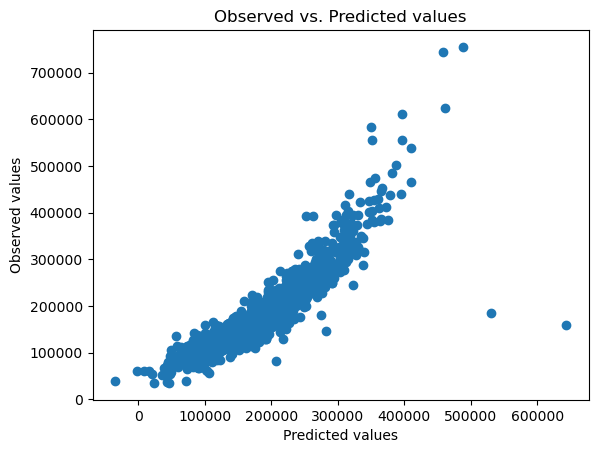

In [18]:
# Plot observed vs. predicted values to check linearity
plt.scatter(model1.fittedvalues, y1)
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.title('Observed vs. Predicted values')
plt.show()

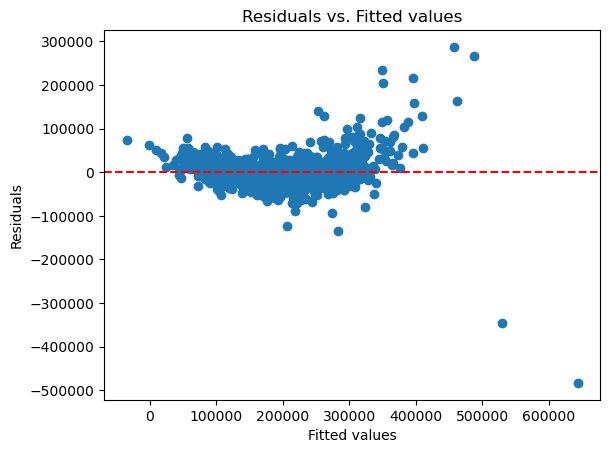

In [19]:
# Plot residuals vs. fitted values to check homoscedasticity
plt.scatter(model1.fittedvalues, model1.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Check the Error distribution

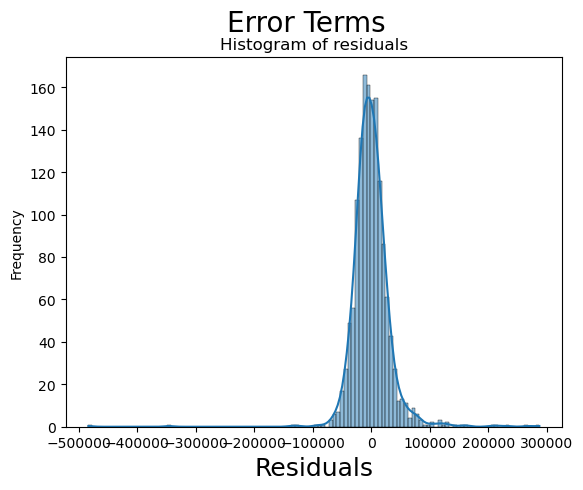

In [20]:
# Histogram of residuals to check normality
fig = plt.figure()
sns.histplot(model1.resid, bins=120, kde=True)
fig.suptitle('Error Terms', fontsize=20)
plt.title('Histogram of residuals')
plt.xlabel('Residuals', fontsize=18)
plt.ylabel('Frequency')
plt.show()

In [21]:
# Compute the correlation matrix
# independent_vars - does not have target variable - SalePrice
# abs() - to include both +ve and -ve corr values
correlation_matrix = all_vars.corr().abs()

# Unstack the correlation matrix and reset the index
corr_pairs = correlation_matrix.unstack().reset_index()

# Rename the columns for clarity
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter pairs where the correlation is above a specific threshold (e.g., 0.8)
threshold = 0.8
high_corr_pairs = corr_pairs[(corr_pairs['Correlation'] > threshold) & (corr_pairs['Feature1'] != 'SalePrice') & (corr_pairs['Feature2'] != 'SalePrice') & (corr_pairs['Feature1'] != corr_pairs['Feature2'])]

# Remove duplicate pairs (e.g., (A, B) and (B, A))
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] < high_corr_pairs['Feature2']]

# Sort by correlation
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

# Display the resulting DataFrame
print(high_corr_pairs)

        Feature1      Feature2  Correlation
689   GarageArea    GarageCars     0.882475
614  GarageYrBlt     YearBuilt     0.845141
396    GrLivArea  TotRmsAbvGrd     0.825489
329     1stFlrSF   TotalBsmtSF     0.819530


In [22]:
#function to look at null/blank/NaN/NA values in columns
# Function to count NA / NaN / Null / blank values
def blank_count_check(df):
    # Count NA / NaN / Null values
    null_counts = df.isnull().sum()
    
    # Count blank values
    blank_counts = (df == '').sum()
    
    # Combine the counts into a DataFrame
    total_counts = pd.DataFrame({
        'Column': df.columns,
        'NA/NaN/Null Count': null_counts,
        'Blank Count': blank_counts,
        'Total Count': null_counts + blank_counts 
    })
    
    return total_counts

In [23]:
# Get the counts
na_null_blank_counts = blank_count_check(df)
na_null_blank_counts = na_null_blank_counts[na_null_blank_counts['Total Count']>0]
# Print the counts
print(na_null_blank_counts)

                    Column  NA/NaN/Null Count  Blank Count  Total Count
LotFrontage    LotFrontage                259            0          259
MasVnrType      MasVnrType                872            0          872
MasVnrArea      MasVnrArea                  8            0            8
BsmtQual          BsmtQual                 37            0           37
BsmtCond          BsmtCond                 37            0           37
BsmtExposure  BsmtExposure                 38            0           38
BsmtFinType1  BsmtFinType1                 37            0           37
BsmtFinType2  BsmtFinType2                 38            0           38
Electrical      Electrical                  1            0            1
GarageType      GarageType                 81            0           81
GarageFinish  GarageFinish                 81            0           81
GarageQual      GarageQual                 81            0           81
GarageCond      GarageCond                 81            0      

In [24]:
#Replace other non-numeric variables null values with default values abased on data dictionary
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'None')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'NA')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'NA')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'NA')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'NA')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'NA')
df['GarageType'] = df['GarageType'].replace(np.nan, 'NA')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'NA')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'NA')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'NA')
df['Electrical'] = df['Electrical'].replace(np.nan, 'Mix')

In [25]:
#verify again
# Get the counts
na_null_blank_counts = blank_count_check(df)
na_null_blank_counts = na_null_blank_counts[na_null_blank_counts['Total Count']>0]
# Print the counts
print(na_null_blank_counts)

                  Column  NA/NaN/Null Count  Blank Count  Total Count
LotFrontage  LotFrontage                259            0          259
MasVnrArea    MasVnrArea                  8            0            8


In [26]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
dftype_dict = df_numeric.dtypes.to_dict()
for col,typ in dftype_dict.items():
    #print(col, typ)
    df[col].fillna(df[col].mean(), inplace=True) 

In [27]:
### Lets work on the categorical features
cat_df = df.select_dtypes(include=['object'])
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


### Lets perform Label encoding on the categorical columns

In [28]:
print('Before Label encoding:',df.shape)
label_encoder = LabelEncoder()
for col in cat_df.columns:
    print('Operating on: '+ col)
    print(df.shape)
    df[col+'_enc'] = label_encoder.fit_transform(df[col])
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    # Print the encoded DataFrame and the label mapping
    print(df.shape)
    print(label_mapping)
df.head()
print('Afetr Label encoding:',df.shape)

Before Label encoding: (1460, 67)
Operating on: MSZoning
(1460, 67)
(1460, 68)
{'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}
Operating on: Street
(1460, 68)
(1460, 69)
{'Grvl': 0, 'Pave': 1}
Operating on: LotShape
(1460, 69)
(1460, 70)
{'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
Operating on: LandContour
(1460, 70)
(1460, 71)
{'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
Operating on: Utilities
(1460, 71)
(1460, 72)
{'AllPub': 0, 'NoSeWa': 1}
Operating on: LotConfig
(1460, 72)
(1460, 73)
{'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
Operating on: LandSlope
(1460, 73)
(1460, 74)
{'Gtl': 0, 'Mod': 1, 'Sev': 2}
Operating on: Neighborhood
(1460, 74)
(1460, 75)
{'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr':

In [29]:
print('Before Removing Cat columns', df.shape)
# Dropping colums
cat_df = df.select_dtypes(include=['object'])
for col in cat_df.columns:
    df.drop(col, axis=1, inplace=True)
print('Removed Cat columns', df.shape)
df.head()

Before Removing Cat columns (1460, 105)
Removed Cat columns (1460, 67)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Electrical_enc,KitchenQual_enc,Functional_enc,GarageType_enc,GarageFinish_enc,GarageQual_enc,GarageCond_enc,PavedDrive_enc,SaleType_enc,SaleCondition_enc
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,4,2,6,1,2,5,5,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,4,3,6,1,2,5,5,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,4,2,6,1,2,5,5,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,4,2,6,5,3,5,5,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,4,2,6,1,2,5,5,2,8,4


## Perform Test/Train Split

In [30]:
# 1
# remove_features = ['LotFrontage', 'BsmtUnfSF','YearBuilt','GrLivArea','BsmtFinSF1', 'TotalBsmtSF','2ndFlrSF','1stFlrSF', 'HalfBath', 'BedroomAbvGr', 'GarageYrBlt', 'GarageArea',
#        'OpenPorchSF', 'MoSold', 'MSZoning_enc', 'Street_enc', 'Utilities_enc',
#        'Condition1_enc', 'Condition2_enc', 'Exterior2nd_enc', 'ExterCond_enc',
#        'Heating_enc', 'Electrical_enc', 'GarageType_enc', 'GarageCond_enc','YearRemodAdd','MSSubClass','BldgType_enc']
# remove_features = []
# 2 ridge
remove_features = ['LotFrontage', 'BsmtUnfSF','GrLivArea','BsmtFinSF1', 'TotalBsmtSF','2ndFlrSF','1stFlrSF', 'HalfBath', 'BedroomAbvGr', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'MoSold', 'MSZoning_enc', 'Street_enc', 'Utilities_enc',
       'Condition1_enc', 'Condition2_enc', 'Exterior2nd_enc', 'ExterCond_enc','Electrical_enc', 'GarageType_enc', 'GarageCond_enc','YearRemodAdd','MSSubClass',
                  'YrSold','BsmtFinType2_enc','SaleType_enc','LotConfig_enc','Functional_enc']
print(df.shape)
#based on multiple ittirations
df.drop(remove_features,axis=1,inplace=True)
X = df.drop('SalePrice',axis=1)
print(df.shape)
y = df['SalePrice'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(1460, 67)
(1460, 37)


((1021, 36), (439, 36), (1021,), (439,))

### Scale training data set

In [31]:
# Scaling the variables
scaler = MinMaxScaler()
# Fit and transform the data
scaled_X_train_df = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#scaled_y_train_df = pd.DataFrame(scaler.fit_transform(y_train), columns=y_train.columns)

# Transform X_test (using the same scaler fitted on X_train)
scaled_X_test_df = scaler.transform(X_test)

scaled_X_train_df.head()
#scaled_y_train_df.head()



,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFullBath,FullBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,...,BsmtExposure_enc,BsmtFinType1_enc,Heating_enc,HeatingQC_enc,CentralAir_enc,KitchenQual_enc,GarageFinish_enc,GarageQual_enc,PavedDrive_enc,SaleCondition_enc
0,0.043628,0.285714,0.571429,0.586957,0.0000,0.5,0.333333,0.0,0.181818,0.000000,...,1.00,0.166667,0.2,1.0,1.0,1.000000,1.000000,1.0,1.0,0.8
1,0.060366,0.714286,0.428571,0.963768,0.2375,0.0,1.000000,0.0,0.545455,0.333333,...,0.00,1.000000,0.2,0.0,1.0,0.666667,0.666667,1.0,1.0,1.0
2,0.053743,0.428571,0.428571,0.905797,0.0000,0.5,0.666667,0.0,0.454545,0.000000,...,0.25,0.333333,0.2,0.5,1.0,0.666667,0.666667,1.0,1.0,0.8
3,0.063114,0.428571,0.428571,0.717391,0.1575,0.0,0.666667,0.0,0.454545,0.333333,...,1.00,0.833333,0.2,0.5,1.0,1.000000,0.666667,1.0,1.0,0.8
4,0.057029,0.714286,0.428571,0.971014,0.1300,0.5,0.666667,0.0,0.454545,0.333333,...,1.00,0.333333,0.2,0.0,1.0,0.666667,0.666667,1.0,1.0,0.8


### Examine Performance on  Ridge & Lasso

In [32]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming X_train is your training data and y_train is your target variable

# Add a constant column to X_train for intercept
X_train_with_constant = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_constant.values, i) for i in range(X_train_with_constant.shape[1])]

# Filter VIF values >= 4.5 and sort by VIF in descending order
high_vif_data = vif_data[vif_data["VIF"] >= 4.5].sort_values(by="VIF", ascending=False)

# Print the VIF values that are >= 4.5
print("Features with VIF >= 4.5 (sorted high to low):")
print(high_vif_data)

# Additionally, print the shapes of the datasets
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


Features with VIF >= 4.5 (sorted high to low):
     feature           VIF
0      const  20740.882914
4  YearBuilt      4.957752
X_train.shape: (1021, 36)
X_test.shape: (439, 36)
y_train.shape: (1021,)
y_test.shape: (439,)


- It's generally recommended to scale the data after the test-train split. 
- This is to prevent data leakage from the test set into the training set. 
- Here's the typical workflow:
- Split the Data: 
    - First, split your dataset into training and testing sets 
    - using train_test_split or a similar method.

- Fit the Scaler on Training Data: 
    - Fit the scaler (e.g., StandardScaler) on the training data only. 
    - This ensures that the scaler is learning the parameters 
    - (e.g., mean and standard deviation) only from the training set.

- Transform Training and Test Data: 
    - After fitting the scaler, transform both the training and test datasets. 
    - This scales the features (and target variable if needed) 
    - to a consistent scale for both datasets.

In [33]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming X_train is your training data and y_train is your target variable

# Add a constant column to X_train for intercept
X_train_with_constant = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_constant.values, i) for i in range(X_train_with_constant.shape[1])]

# Filter VIF values <= 4.5 and sort by VIF in descending order
high_vif_data = vif_data[vif_data["VIF"] <= 4.5].sort_values(by="VIF", ascending=True)

# Print the VIF values that are <= 4.5
print("Features with VIF <= 4.5 (sorted high to low):")
print(high_vif_data)

# Additionally, print the shapes of the datasets
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


Features with VIF <= 4.5 (sorted high to low):
              feature       VIF
36  SaleCondition_enc  1.115492
20       RoofMatl_enc  1.134775
26       BsmtCond_enc  1.159018
16   Neighborhood_enc  1.169231
13       LotShape_enc  1.173644
21    Exterior1st_enc  1.190607
19      RoofStyle_enc  1.193828
12         WoodDeckSF  1.242842
29        Heating_enc  1.267120
14    LandContour_enc  1.269630
18     HouseStyle_enc  1.288922
22     MasVnrType_enc  1.318500
27   BsmtExposure_enc  1.337502
17       BldgType_enc  1.388335
35     PavedDrive_enc  1.431074
34     GarageQual_enc  1.434212
3         OverallCond  1.451298
10         Fireplaces  1.456047
8        KitchenAbvGr  1.534908
28   BsmtFinType1_enc  1.546422
6        BsmtFullBath  1.549185
33   GarageFinish_enc  1.549404
1             LotArea  1.561872
30      HeatingQC_enc  1.606173
5          MasVnrArea  1.618994
15      LandSlope_enc  1.670935
31     CentralAir_enc  1.678392
32    KitchenQual_enc  1.991817
24     Foundation_enc  2.

# Ridge

In [34]:

# Define alpha values to try
alpha_values = [0,1,2,10,100,1000]

# Loop through alpha values
for alpha in alpha_values:
    # Initialize Ridge regression with the current alpha
    ridge = Ridge(alpha=alpha)
    
    # Fit Ridge regression on the scaled training data
    ridge.fit(scaled_X_train_df, y_train)
    
    # Predict on the training and test sets
    y_train_pred = ridge.predict(scaled_X_train_df)
    y_test_pred = ridge.predict(scaled_X_test_df)
    
    # Calculate R^2 scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Output the results
    print(f"Alpha: {alpha}, R^2(Train): {r2_train}, R^2(Test): {r2_test},f-c:{scaled_X_train_df.shape[1]}")

Alpha: 0, R^2(Train): 0.8200056922641068, R^2(Test): 0.8233962963666062,f-c:36
Alpha: 1, R^2(Train): 0.819604378438171, R^2(Test): 0.8238482908133387,f-c:36
Alpha: 2, R^2(Train): 0.8187824573686472, R^2(Test): 0.824026926828994,f-c:36
Alpha: 10, R^2(Train): 0.8084989325229753, R^2(Test): 0.8183263587340314,f-c:36
Alpha: 100, R^2(Train): 0.709874115627811, R^2(Test): 0.7186899523767862,f-c:36
Alpha: 1000, R^2(Train): 0.3441852136807495, R^2(Test): 0.34866783920266653,f-c:36


# Lasso

In [35]:
# Define a range of alpha values to try
alpha_values = [0.01, 0.1, 1, 10, 100, 200, 500, 1000]

# Initialize lists to store results
results = []

# Loop through alpha values
for alpha in alpha_values:
    # Initialize Lasso regression with the current alpha
    lasso = Lasso(alpha=alpha)
    
    # Fit Lasso regression on the scaled training data
    lasso.fit(scaled_X_train_df, y_train)
    
    # Predict on the training and test sets
    y_train_pred = lasso.predict(scaled_X_train_df)
    y_test_pred = lasso.predict(scaled_X_test_df)
    
    # Calculate R^2 scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Store the results
    results.append((alpha, r2_train, r2_test))

    # Output the results
    print(f"Alpha: {alpha}, R^2(Train): {r2_train}, R^2(Test): {r2_test},f-c:{scaled_X_train_df.shape[1]}")
    
# # Print the results
# print("Alpha, R^2 (Train), R^2 (Test):")
# for alpha, r2_train, r2_test in results:
#     print(f"{alpha}, {r2_train}, {r2_test}")
    
    # Get the coefficients and corresponding feature names
    #coefficients = lasso.coef_
    #feature_names = scaled_X_train_df.columns
    # Find the features with coefficient of 0
    #zero_coefficient_features = feature_names[coefficients == 0]
    # Print the features with coefficient of 0
    #print("Features with coefficient of 0:", zero_coefficient_features)

Alpha: 0.01, R^2(Train): 0.82000569223768, R^2(Test): 0.8233967258756251,f-c:36
Alpha: 0.1, R^2(Train): 0.8200056896279841, R^2(Test): 0.8234005346155866,f-c:36
Alpha: 1, R^2(Train): 0.8200054280264885, R^2(Test): 0.8234389347012501,f-c:36
Alpha: 10, R^2(Train): 0.8199792398376995, R^2(Test): 0.8237932370777807,f-c:36
Alpha: 100, R^2(Train): 0.818399697268194, R^2(Test): 0.825052838278836,f-c:36
Alpha: 200, R^2(Train): 0.8141756927836463, R^2(Test): 0.8231185134951658,f-c:36
Alpha: 500, R^2(Train): 0.797903805770434, R^2(Test): 0.8140674590805884,f-c:36
Alpha: 1000, R^2(Train): 0.7734406943397742, R^2(Test): 0.7945822184877406,f-c:36
